In [1]:
import numpy as np
import pandas as pd
from uncertainties import unumpy, ufloat

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import seaborn as sns

import os
import glob

In [2]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

#params = {'text.latex.preamble':[r'\usepackage{siunitx}',
#                                 r'\usepackage{amsmath}',
#                                 r'\usepackage{physics}',
#                                 r'\usepackage{sfmath}',
#                                 r'\sisetup{detect-all=true}']}

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

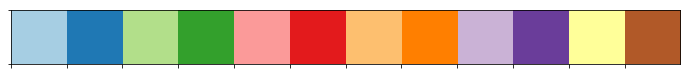

In [3]:
sns.palplot(sns.color_palette("Paired"))

# Molecular potential and nu=0 wave function vs. n

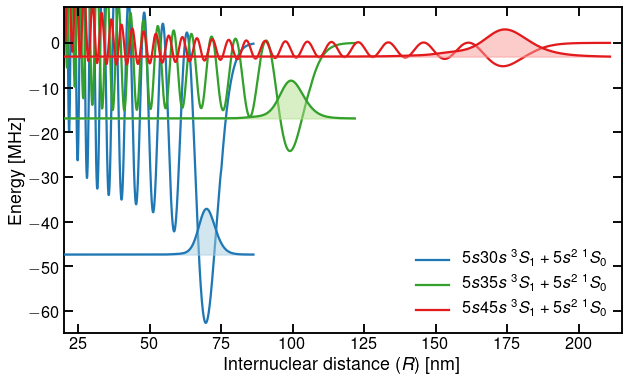

In [35]:
sns.set_context('talk')

fig = plt.figure(figsize=(10,6))
ax = plt.gca()

########################################
# Global options
fill_alpha = 0.5

########################################
# n=30
n = 30
sheet_name = 'n'+str(n)
pot_label = r'${5s30s}{\;}^{3}{S}_{1} + {5s^2}{\;}^{1}{S}_{0}$'
pot_line_color = sns.color_palette("Paired")[1]
wvf_line_color = sns.color_palette("Paired")[1]
wvf_fill_color = sns.color_palette("Paired")[0]

pot = pd.read_excel('pot_87Sr_without_ion_atom.xlsx', sheet_name = sheet_name, header=0)
wvf = pd.read_excel('wvf_87Sr_without_ion_atom-nu0.xlsx', sheet_name = sheet_name, header=0)

wvf_scale = -1E2
wvf_offset = wvf['E (MHz)'][0]

plt.plot(pot['R (nm)'], pot['Energy shift (MHz)'],
         color=pot_line_color, label=pot_label, zorder=1)
plt.plot(wvf['R (nm)'], wvf_scale*wvf['R psi(R)'] + wvf_offset,
         color=wvf_line_color, label='_nolegend_', zorder=3)
plt.fill_between(wvf['R (nm)'], wvf_scale*wvf['R psi(R)'] + wvf_offset, wvf_offset,
                 color=wvf_fill_color, alpha=fill_alpha, zorder=2)

########################################
# n=35
n = 35
sheet_name = 'n'+str(n)
pot_label = r'${5s35s}{\;}^{3}{S}_{1} + {5s^2}{\;}^{1}{S}_{0}$'
pot_line_color = sns.color_palette("Paired")[3]
wvf_line_color = sns.color_palette("Paired")[3]
wvf_fill_color = sns.color_palette("Paired")[2]

pot = pd.read_excel('pot_87Sr_without_ion_atom.xlsx', sheet_name = sheet_name, header=0)
wvf = pd.read_excel('wvf_87Sr_without_ion_atom-nu0.xlsx', sheet_name = sheet_name, header=0)

wvf_scale = 1E2
wvf_offset = wvf['E (MHz)'][0]

plt.plot(pot['R (nm)'], pot['Energy shift (MHz)'],
         color=pot_line_color, label=pot_label, zorder=1)
plt.plot(wvf['R (nm)'], wvf_scale*wvf['R psi(R)'] + wvf_offset,
         color=wvf_line_color, label='_nolegend_', zorder=3)
plt.fill_between(wvf['R (nm)'], wvf_scale*wvf['R psi(R)'] + wvf_offset,
                 wvf_offset, color=wvf_fill_color, alpha=fill_alpha, zorder=2)

########################################
# n=45
n = 45
sheet_name = 'n'+str(n)
pot_label = r'${5s45s}{\;}^{3}{S}_{1} + {5s^2}{\;}^{1}{S}_{0}$'
pot_line_color = sns.color_palette("Paired")[5]
wvf_line_color = sns.color_palette("Paired")[5]
wvf_fill_color = sns.color_palette("Paired")[4]

pot = pd.read_excel('pot_87Sr_without_ion_atom.xlsx', sheet_name = sheet_name, header=0)
wvf = pd.read_excel('wvf_87Sr_without_ion_atom-nu0.xlsx', sheet_name = sheet_name, header=0)

wvf_scale = -1E2
wvf_offset = wvf['E (MHz)'][0]

plt.plot(pot['R (nm)'], pot['Energy shift (MHz)'],
         color=pot_line_color, label=pot_label, zorder=1)
plt.plot(wvf['R (nm)'], wvf_scale*wvf['R psi(R)'] + wvf_offset,
         color=wvf_line_color, label='_nolegend_', zorder=3)
plt.fill_between(wvf['R (nm)'], wvf_scale*wvf['R psi(R)'] + wvf_offset,
                 wvf_offset, color=wvf_fill_color, alpha=fill_alpha, zorder=2)

########################################
# Plot options

# Axis limits
ax.set_xlim((20, 215))
ax.set_ylim(bottom=-65, top=8)

# Axis tick options
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which='both', axis='both', direction='in')

# Axis labels
ax.set_xlabel(r'Internuclear distance ($R$) [\si{\nm}]')
ax.set_ylabel(r'Energy [\si{\MHz}]')

plt.legend(frameon=False)

plt.savefig('vary_n-nu0.pdf', bbox_inches='tight', transparent=True)

plt.show()

# Location of nu=0 peak vs. n

In [45]:
n_list = np.arange(30, 45+1, 1)
R_list = np.zeros(len(n_list))

for idx, n in enumerate(n_list):
    sheet_name = 'n'+str(n)
    wvf = pd.read_excel('wvf_87Sr_without_ion_atom-nu0.xlsx', sheet_name = sheet_name, header=0)
    
    nu_0_max_idx = np.abs(wvf['R psi(R)']).idxmax(axis=0)
    R_list[idx] = wvf['R (nm)'][nu_0_max_idx]

In [68]:
def delta(n):
    d0 = ufloat(3.371, 0.002)
    d2 = ufloat(0.5, 0.2)
    d4 = ufloat(-1, 2)*1E1
    return d0 + d2/(n-d0)**2 + d4/(n-d0)**4

def R_n_nu0(n):
    A0 = ufloat(5.29177210903, 0.00000000080)*1E-11 # [m] Bohr radius
    R = A0 * 1.87*(n-delta(n))**2
    return R*1E9  

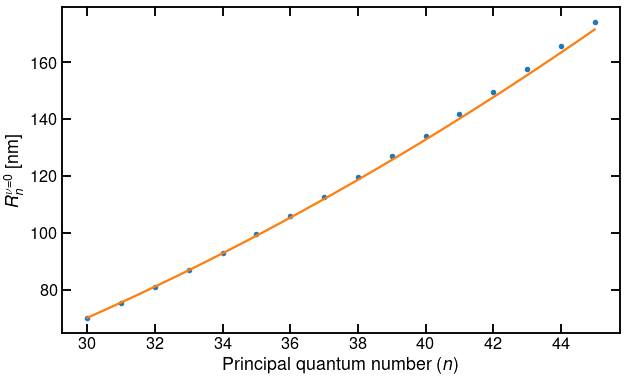

In [69]:
sns.set_context('talk')

fig = plt.figure(figsize=(10,6))
ax = plt.gca()

########################################
# Global options

########################################
# Plot
plt.plot(n_list, R_list, '.')

n = np.linspace(min(n_list), max(n_list), endpoint=True)
R = R_n_nu0(n)
R_nom = unumpy.nominal_values(R)
R_unc = unumpy.std_devs(R)
plt.plot(n, R_nom)
plt.fill_between(n, R_nom+R_unc, R_nom-R_unc)

########################################
# Plot options

# Axis tick options
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which='both', axis='both', direction='in')

# Axis labels
ax.set_xlabel(r'Principal quantum number ($n$)')
ax.set_ylabel(r'$R^{\nu=0}_{n}$ [\si{\nm}]')

#plt.legend(frameon=False)

plt.show()